<a href="https://colab.research.google.com/github/tharuns05/Diabetes-Classification/blob/main/DiabetesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification



# Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from google.colab import files

uploaded = files.upload()

df = pd.read_csv("diabetes.csv")

df

Saving diabetes.csv to diabetes (6).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Cleaning


In [ ]:
cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv("diabetes.csv") # Read with header, remove names=cols
# Remove df = df.drop(0) as the header is now correctly read

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


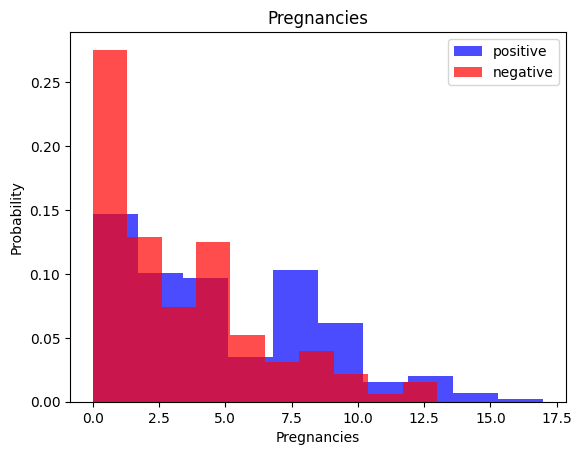

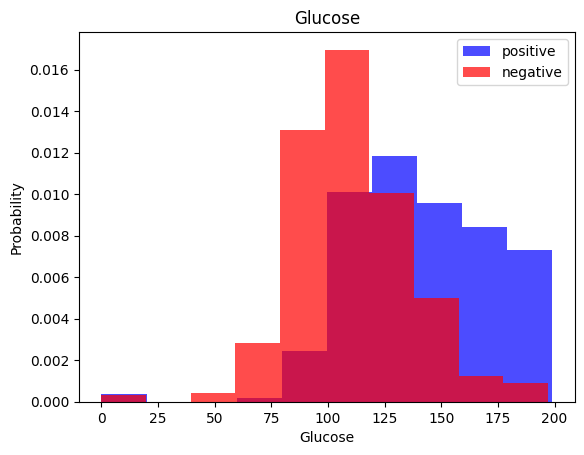

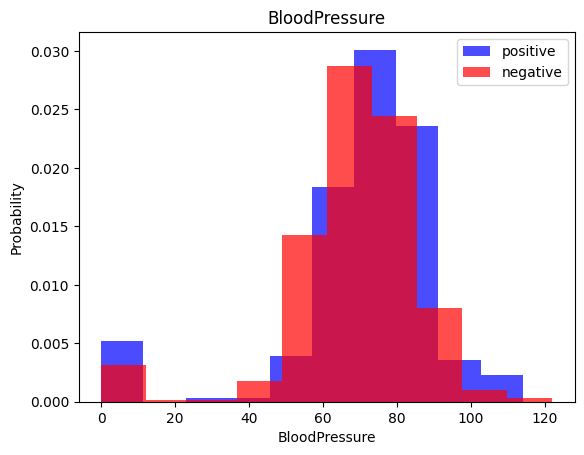

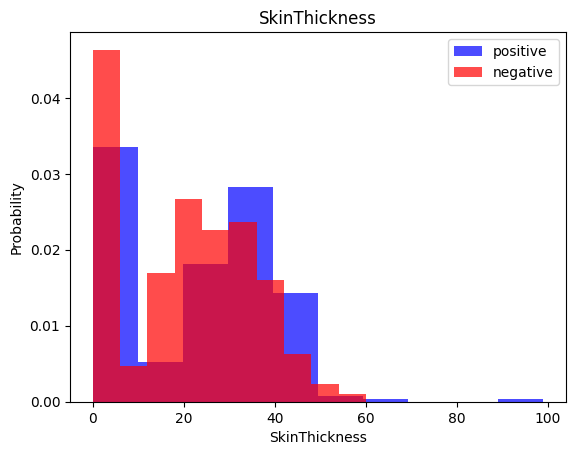

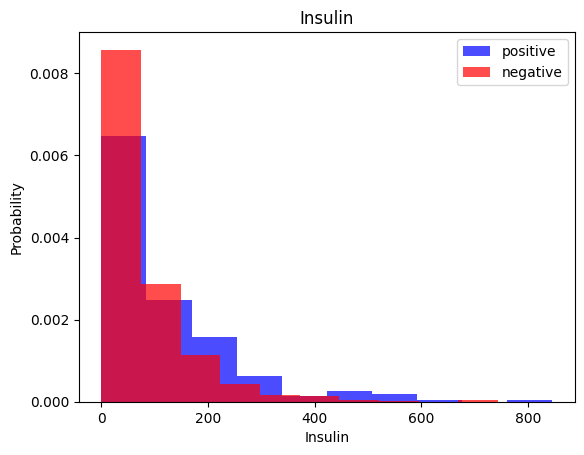

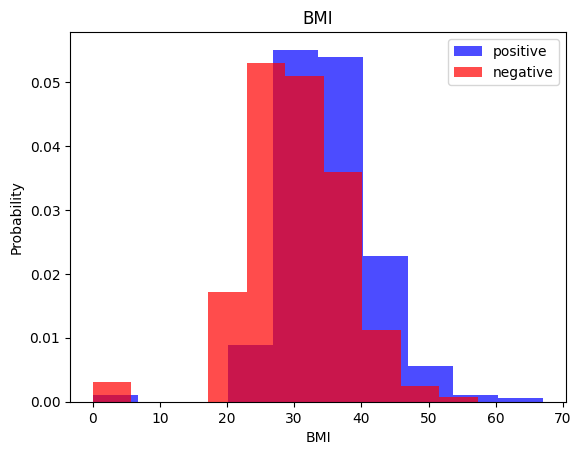

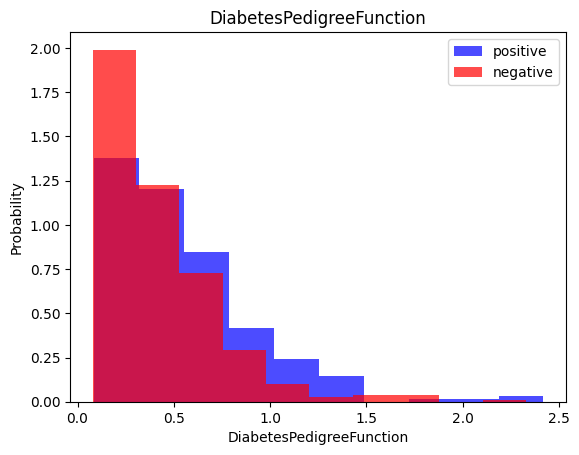

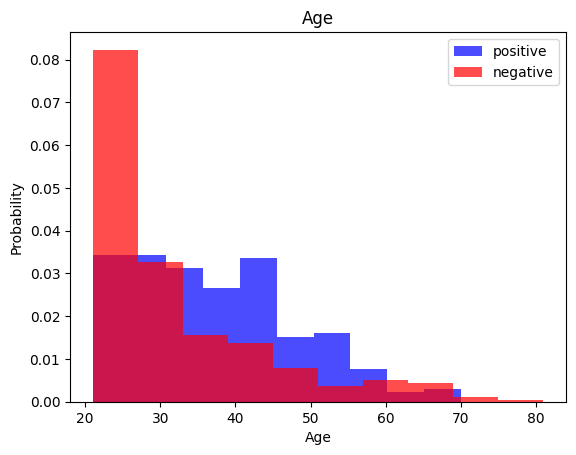

In [ ]:


for label in cols[:-1]:
  plt.hist(df[df["Outcome"] == 1][label], color = 'blue', label = 'positive', alpha= 0.7, density =True)
  plt.hist(df[df["Outcome"] == 0][label], color = 'red', label = 'negative', alpha= 0.7, density =True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Training, validating and testing datasets



In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])


train = pd.DataFrame(train, columns=df.columns)
valid = pd.DataFrame(valid, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  X = dataframe.iloc[:, :-1]
  y = dataframe.iloc[:, -1]

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X_scaled, y = ros.fit_resample(X_scaled, y)

  data = np.hstack((X_scaled, np.reshape(y, (len(y), 1))))

  return data, X_scaled, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
print(X_train, y_train)

[[-0.82776511 -1.1117299  -0.22355748 ...  0.56358507 -0.0399608
  -0.43122005]
 [-0.51616777 -0.98822673  0.2715626  ... -0.42715997 -0.74921402
  -0.96612673]
 [-1.13936245  0.33943235 -3.392326   ...  1.35367289 -0.62905128
  -0.60952228]
 ...
 [-0.82776511 -0.55596563  0.2715626  ...  0.88965306 -0.56164292
   0.81689552]
 [ 0.73022159  2.31548308  0.07351457 ... -0.18887952 -0.45906497
  -0.16376672]
 [-0.51616777  1.66709144  0.96473071 ...  1.51670688  0.47292892
  -0.7878245 ]] 0      0
1      0
2      1
3      0
4      0
      ..
585    1
586    1
587    1
588    1
589    1
Name: Outcome, Length: 590, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_val_pred = model.predict(X_valid)
print("Accuracy is: ", accuracy_score(y_valid, y_val_pred))
print(classification_report(y_valid, y_val_pred))


Accuracy is:  0.7727272727272727
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.70      0.71      0.71        59

    accuracy                           0.77       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_valid)

print("Accuracy is: ", accuracy_score(y_valid, y_val_pred_rf))
print(classification_report(y_valid, y_val_pred_rf))


Accuracy is:  0.7987012987012987
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        95
           1       0.78      0.66      0.72        59

    accuracy                           0.80       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.80      0.79       154



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_test)

print("Accuracy is: ", accuracy_score(y_test, y_val_pred_svm))
print(classification_report(y_test, y_val_pred_svm))


Accuracy is:  0.7532467532467533
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       104
           1       0.59      0.76      0.67        50

    accuracy                           0.75       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154



In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score




# svm_model = svm.SVC(kernel="rbf", C= 1.0, gamma=0.0011)
svm_model = svm.SVC(kernel="rbf", C = 10, gamma= 1)

svm_model.fit(X_train, y_train)

y_val_pred_svmrbf = svm_model.predict(X_valid)

print("Accuracy is: ", accuracy_score(y_valid, y_val_pred_svmrbf))
print(classification_report(y_valid, y_val_pred_svmrbf))


Accuracy is:  0.6948051948051948
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        95
           1       0.66      0.42      0.52        59

    accuracy                           0.69       154
   macro avg       0.68      0.64      0.65       154
weighted avg       0.69      0.69      0.68       154



In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

param = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001,'scale'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param, refit= True, verbose= 1, cv = 5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


y_val_pred_svmgrid = grid.predict(X_valid)

print("Accuracy is: ", accuracy_score(y_valid, y_val_pred_svmgrid))
print(classification_report(y_valid, y_val_pred_svmgrid))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8523140495867768
Accuracy is:  0.6948051948051948
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        95
           1       0.66      0.42      0.52        59

    accuracy                           0.69       154
   macro avg       0.68      0.64      0.65       154
weighted avg       0.69      0.69      0.68       154



In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

def find_loss(t, y):
  epsilon = 1e-15
  return -np.sum(t* np.log(y+epsilon) + (1-t)*np.log(1-y+epsilon)) / len(t)

def gradient_descent(obsX, obsY, alpha, threshold):
  iterations = 0
  # obsY = obsY.reshape(-1, 1)
  i, j = obsX.shape
  theta = np.zeros((j, 1))
  oldError = -1
  newError = 0
  while abs(newError - oldError) >= threshold:
    z = np.dot(obsX, theta)
    h = sigmoid(z)
    loss = find_loss(obsY, h)
    gradient = np.dot(obsX.T, (h - obsY)) / i
    theta = theta - alpha * gradient
    oldError = newError
    newError = loss
    iterations += 1

    print(f"Iteration: {iterations}, Loss: {loss}")
  return theta, newError, iterations


y_train = y_train.values.reshape(-1, 1)
theta, newError, iterations = gradient_descent(X_train, y_train, 0.1, 0.0001)
print(newError)




Iteration: 1, Loss: 0.6931471805599434
Iteration: 2, Loss: 0.6814939493509276
Iteration: 3, Loss: 0.6709565923040322
Iteration: 4, Loss: 0.6614152971851085
Iteration: 5, Loss: 0.6527615155530926
Iteration: 6, Loss: 0.6448978081153669
Iteration: 7, Loss: 0.6377373161774279
Iteration: 8, Loss: 0.6312030065520208
Iteration: 9, Loss: 0.6252268022298006
Iteration: 10, Loss: 0.6197486786052161
Iteration: 11, Loss: 0.6147157781400404
Iteration: 12, Loss: 0.6100815757376481
Iteration: 13, Loss: 0.6058051122497919
Iteration: 14, Loss: 0.6018503033955271
Iteration: 15, Loss: 0.5981853248132699
Iteration: 16, Loss: 0.5947820699935413
Iteration: 17, Loss: 0.5916156756511141
Iteration: 18, Loss: 0.5886641080889031
Iteration: 19, Loss: 0.5859078038495737
Iteration: 20, Loss: 0.5833293581451134
Iteration: 21, Loss: 0.5809132549989564
Iteration: 22, Loss: 0.5786456335994858
Iteration: 23, Loss: 0.5765140859664658
Iteration: 24, Loss: 0.5745074816245213
Iteration: 25, Loss: 0.5726158155331763
Iteration

## Test Model


In [ ]:

ans = sigmoid(np.dot(X_test, theta))


predictions = (ans >= 0.5).astype(int)


if hasattr(y_test, "values"):
    y_test = y_test.values.reshape(-1, 1)
else:
    y_test = y_test.reshape(-1, 1)


error = np.mean(predictions != y_test)

print("Classification Error:", error)
print("Accuracy:", 1 - error)

Classification Error: 0.21428571428571427
Accuracy: 0.7857142857142857
